In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
from keras.models import Model
import os
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

/Users/shin_ishimaru/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
'''
LOAD Fashion-MNIST
'''
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(type(x_test))
print(type(y_test[0]))

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


In [3]:
# fashion mnist label name
fashion_mnist_labels = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'])

In [4]:
'''
LOAD MODEL AND PREDICT
'''

# use CNN
model = load_model('model_fashion-mnist_cnn_train1_epoch12.h5')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [5]:
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)



intermediante_layer_model = Model(inputs=model.input, outputs=model.get_layer("dropout_2").output)

/Users/shin_ishimaru/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/linalg/linalg.py:2257: RuntimeWarning: invalid value encountered in sqrt
  ret = sqrt(sqnorm)


509


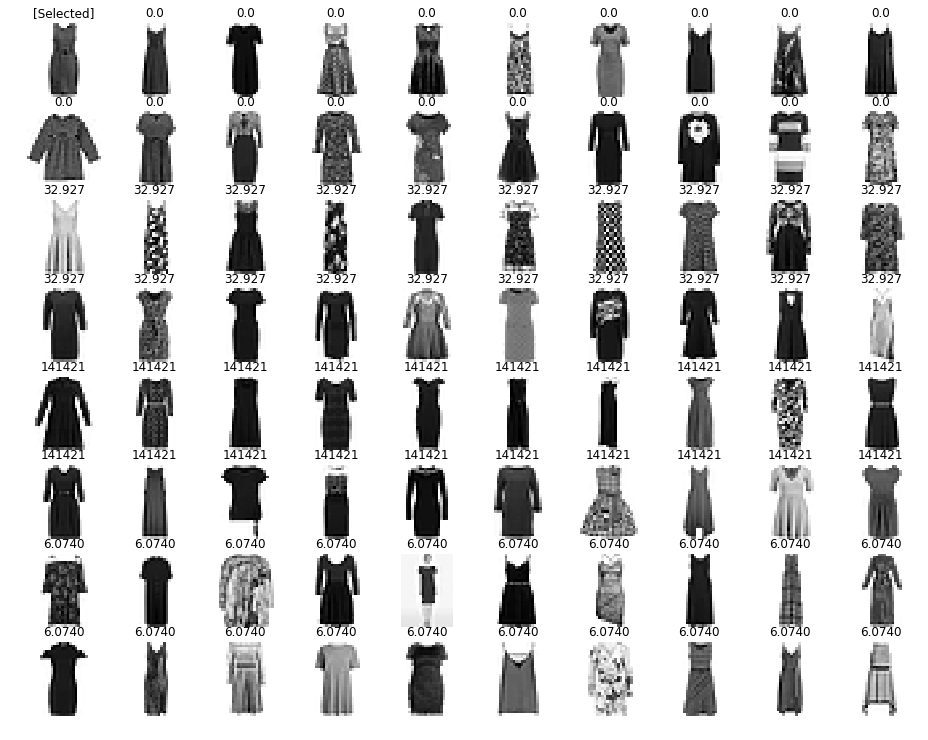

In [9]:
'''
一枚選んだ画像と、同種別と判定され、なおかつベクトルが近いモノを100個表示する
'''
plt.figure(figsize=(16,16))

index = random.randint(0, x_test.shape[0])
#index = 0
image = x_test[index]
data = convertMnistData(image)

# 選んだ画像の特徴ベクトルを取得
vec = intermediante_layer_model.predict(data, batch_size=1)
predict_ret = model.predict(data, batch_size=1) 
#print(predict_ret)
#print(type(predict_ret))

plt.subplot(10, 10, 1)
plt.imshow(image,  cmap=cm.gray_r)
plt.axis('off')
plt.title('[Selected]')
# x_testの中からpredict結果が合致するモノを、ベクトルを検索してarrayに追加

img_tuples = []

for comp_img in x_test:
    data = convertMnistData(comp_img)
    pre = model.predict(data, batch_size=1) 
        
    if np.all(predict_ret == pre) == False:
        continue
    
    v = intermediante_layer_model.predict(data, batch_size=1)
    dist = vec - v
    dist_norm = np.linalg.norm(dist) 

    #if math.isnan(dist_norm) == False and dist_norm > 0.0:
    if math.isnan(dist_norm) == False:
        img_tuples.append( (dist_norm, comp_img) )

a = sorted(img_tuples, key=lambda im: im[0])
print(len(a))

total = 0
norm = 0
before_norm = 0
same_num = 0

for im in a:
    
    if total == 0:
        norm = im[0]
        
    if im[0] == norm:
        same_num += 1
    else:
        same_num = 0
        norm = im[0]
    
    if same_num > 19:
        continue
    
    plt.subplot(10, 10, 2 + total)
    plt.imshow(im[1],  cmap=cm.gray_r)
    plt.axis('off')
    plt.title(str(im[0]*100000000000)[:6])

    total += 1
    if total >= 99:
        break

plt.show()
